Dataset :https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

# **Step 1: Import Libraries**

In [81]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score,roc_auc_score,f1_score,classification_report,precision_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **Step 2: Load Dataset**

In [21]:
df=pd.read_csv("/content/spam.csv",encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'text']

In [22]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.shape

(5572, 2)

In [23]:
df.isnull().sum()

,0
label,0
text,0


# **Step 3: Text Preprocessing (Clean Text)**

In [46]:
# Assuming df has 'text' and 'label' columns
ps = PorterStemmer()
corpus = []

for i in range(len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    review = review.lower().split()
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    corpus.append(' '.join(review))


# **Step 4: Convert Text to Vectors**

In [60]:
# Using TfidfVectorizer
tv = TfidfVectorizer(max_features=2500,binary= True ,ngram_range=(1,2))
X = tv.fit_transform(corpus).toarray()

In [61]:
y=pd.get_dummies(df['label'],drop_first=True).astype(int)

In [62]:
y.value_counts()

,count
spam,
0,4825
1,747


In [65]:
y.value_counts()

,count
spam,
0,4825
1,747


In [67]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [70]:
from imblearn.over_sampling import SMOTE
X_res,y_res=SMOTE().fit_resample(x,y)
y_res.value_counts()

,count
spam,
0,4825
1,4825


# **Step 5: Exploratory Data Analysis**

Text(0.5, 1.0, 'Distribution of Ham and Spam Messages')

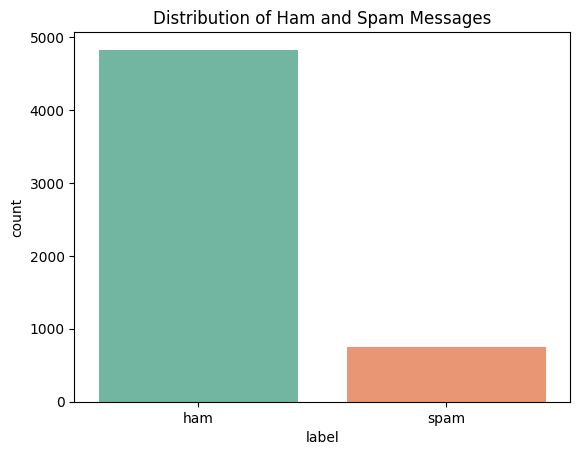

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='label', data=df, palette='Set2')
plt.title('Distribution of Ham and Spam Messages')

#  Generate and Show the WordCloud

In [102]:
from wordcloud import WordCloud

In [110]:
spam_text = ' '.join(df[df['label'] == 'spam']['text'].values)

In [111]:
ham_text = ' '.join(df[df['label'] == 'ham']['text'].values)

In [103]:
wc = WordCloud(width=500,height=500,min_font_size=8,background_color="white")

#  Generate and Show the Spam WordCloud

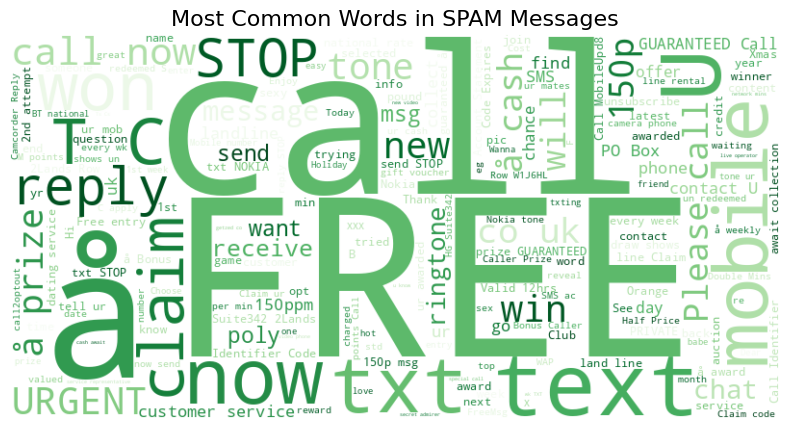

In [116]:
# WordCloud for Spam
spam_wc = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(spam_text)

plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in SPAM Messages', fontsize=16)
plt.show()


# Generate and Show the ham WordCloud

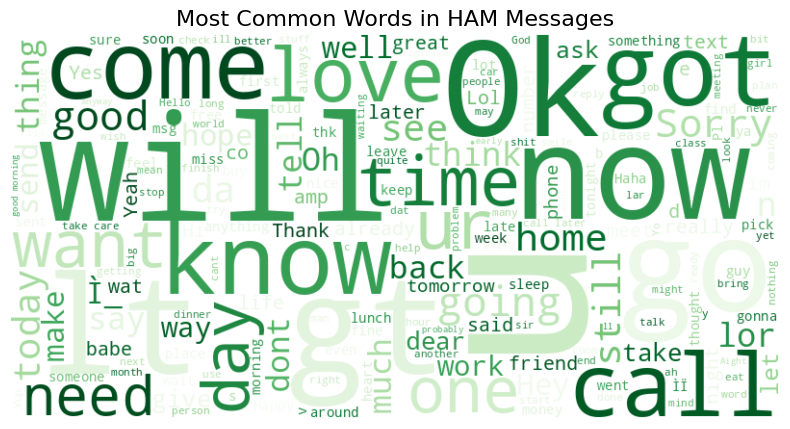

In [119]:
# WordCloud for Spam
ham_wc = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(ham_text)

plt.figure(figsize=(10, 5))
plt.imshow(ham_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in HAM Messages', fontsize=16)
plt.show()

# Train and Split the Data

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=0)

In [72]:
X_train.shape

(7720, 2500)

In [74]:
y_train.shape

(7720, 1)

In [75]:
X_test.shape

(1930, 2500)

In [76]:
y_test.shape

(1930, 1)

# **Step 6: Train the Model**

In [78]:
## LogisticRegression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred1=lr.predict(X_test)
y_pred1_prob =lr.predict_proba(X_test)[:,1]

## MultinomialNB
mb = MultinomialNB()
mb.fit(X_train,y_train)
y_pred2=mb.predict(X_test)
y_pred2_prob =mb.predict_proba(X_test)[:,1]

## RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred3=rf.predict(X_test)
y_pred3_prob =rf.predict_proba(X_test)[:,1]

# **Step 7: Evaluate the Model**

In [85]:
print("LogisticRegression\n")
print("accuracy_score;",accuracy_score(y_test,y_pred1))
print("roc_auc_score:",roc_auc_score(y_test,y_pred1_prob))
print("classification_report:\n",classification_report(y_test,y_pred1))
print("confusion_matrix:\n",confusion_matrix(y_test,y_pred1))

LogisticRegression

accuracy_score; 0.9554404145077721
roc_auc_score: 0.9959070663296015
classification_report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       936
           1       0.98      0.93      0.96       994

    accuracy                           0.96      1930
   macro avg       0.96      0.96      0.96      1930
weighted avg       0.96      0.96      0.96      1930

confusion_matrix:
 [[918  18]
 [ 68 926]]


In [86]:
print("MultinomialNB\n")
print("accuracy_score;",accuracy_score(y_test,y_pred2))
print("roc_auc_score:",roc_auc_score(y_test,y_pred2_prob))
print("classification_report:\n",classification_report(y_test,y_pred2))
print("confusion_matrix:\n",confusion_matrix(y_test,y_pred2))

MultinomialNB

accuracy_score; 0.9678756476683937
roc_auc_score: 0.9950450566647749
classification_report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       936
           1       0.98      0.96      0.97       994

    accuracy                           0.97      1930
   macro avg       0.97      0.97      0.97      1930
weighted avg       0.97      0.97      0.97      1930

confusion_matrix:
 [[914  22]
 [ 40 954]]


In [88]:
print("RandomClassifier\n")
print("accuracy_score:",accuracy_score(y_test,y_pred3))
print("roc_auc_score:",roc_auc_score(y_test,y_pred3_prob))
print("classification_report:\n",classification_report(y_test,y_pred3))
print("confusion_matrix:\n",confusion_matrix(y_test,y_pred3))

RandomClassifier

accuracy_score: 0.9917098445595854
roc_auc_score: 0.9993921864520456
classification_report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       936
           1       0.99      0.99      0.99       994

    accuracy                           0.99      1930
   macro avg       0.99      0.99      0.99      1930
weighted avg       0.99      0.99      0.99      1930

confusion_matrix:
 [[931   5]
 [ 11 983]]


# **Step-8: Cross-Validation**

In [90]:
# Random Forest Classifier
acc_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
f1_scores = cross_val_score(rf, X, y, cv=5, scoring='f1')
rec_scores = cross_val_score(rf, X, y, cv=5, scoring='recall')

print("Accuracy scores:", acc_scores.mean())
print("f1_scores:", f1_scores.mean())
print("recall_scores:",rec_scores.mean())

Accuracy scores: 0.9775654330131791
f1_scores: 0.913826280807258
recall_scores: 0.8540492170022371


In [91]:
# MultinomialNB
acc_scores = cross_val_score(mb, X, y, cv=5, scoring='accuracy')
f1_scores = cross_val_score(mb, X, y, cv=5, scoring='f1')
rec_scores = cross_val_score(mb, X, y, cv=5, scoring='recall')
print("Accuracy scores:", acc_scores.mean())
print("f1_scores:", f1_scores.mean())
print("recall_scores:",rec_scores.mean())

Accuracy scores: 0.9779241774077979
f1_scores: 0.9105803698999242
recall_scores: 0.8406442953020135


In [92]:
 train_acc = lr.score(X_train, y_train)
 test_acc = lr.score(X_test, y_test)
 print("logistic Regression\n")
 print("train acc:",train_acc)
 print("test_acc:",test_acc)

logistic Regression

train acc: 0.9632124352331606
test_acc: 0.9554404145077721


In [93]:
 train_acc = mb.score(X_train, y_train)
 test_acc = mb.score(X_test, y_test)
 print("MultiNomialNB \n")
 print("train acc:",train_acc)
 print("test_acc:",test_acc)

MultiNomialNB 

train acc: 0.9751295336787564
test_acc: 0.9678756476683937


In [94]:
 train_acc =rf.score(X_train, y_train)
 test_acc = rf.score(X_test, y_test)
 print("Random Forest Classifier \n")
 print("train acc:",train_acc)
 print("test_acc:",test_acc)

Random Forest Classifier 

train acc: 0.9997409326424871
test_acc: 0.9917098445595854


# **Step-9: Save The Model**

In [98]:
import joblib
joblib.dump(rf,'spam_classifier.pkl')
model=joblib.load('spam_classifier.pkl')

# **Step-10: Predict the Messages**

In [99]:
def predict_spam(text):
    # Preprocessing
    review = re.sub('[^a-zA-Z]', ' ', text).lower().split()
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    final_text = [' '.join(review)]

    # Transform and predict
    vect = tv.transform(final_text)
    prediction = mb.predict(vect)[0]
    return "spam" if prediction == 1 else "ham"


In [100]:
print(predict_spam("Free Prizes, Gift Cards or Coupons"))

spam


In [101]:
print(predict_spam("It requests personal information"))

ham


In [136]:
print(predict_spam("FreeMsg Hey there darling it's been 3 week's n.."))

spam


In [138]:
print(predict_spam("Had your mobile 11 months or more? U R entitle..."))

spam


In [139]:
print(predict_spam("Even my brother is not like to speak with me. .."))

ham
